In [96]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import numpy as np

In [97]:
f_path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

# 회사가 의약품 제조업으로 신고되어 있는 상장법인 88개의 주식 정보를 모두 크롤링 해옴

 * 의약품 특허 목록 상위 30개와 의약품 판매 승인 목록 상위 30개의 회사들 중 상장되어 있는 회사들의 주식 종합 정보를 분석해볼 예정

In [98]:
stocks_df = pd.read_csv('C:/Users/whileduck/Dropbox/python/허가제약종목종합정보.csv')

In [99]:
stocks_df #의약품 제조업으로 신고되어 있는 회사 88개의 2019~2022년 까지의 주식 종합정보

,업체,실적,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),PER(배),BPS(원),PBR(배),주당배당금(원),시가배당률(%),배당성향(%)
0,휴마시스,최근 연간 실적 : 2019.12,92.0,-9,-12,-9.56,-13.40,-7.82,139.36,76.19,443.19,-44.0,-31.81,542.0,2.57,NaN,NaN,-
1,휴마시스,최근 연간 실적 : 2020.12,457.0,254,209,55.47,45.80,NaN,40.10,249.09,1324.56,642.0,14.80,1424.0,6.67,-,-,-
2,휴마시스,최근 연간 실적 : 2021.12,3218.0,1936.0,1512.0,60.15,46.98,120.63,68.67,171.38,5726.92,4418.0,3.78,5908.0,2.83,200.0,1.2,4.52
3,휴마시스,최근 연간 실적 : 2022.12(E),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,휴마시스,최근 분기 실적 : 2021.09,1014.0,698.0,563.0,68.86,55.55,111.01,31.43,257.31,3542.20,1646.0,5.80,3608.0,4.16,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,영진약품,최근 분기 실적 : 2021.12,539.0,-28.0,-17.0,-5.26,-3.17,-10.56,85.05,103.53,14.70,-9.0,-83.53,573.0,9.22,NaN,NaN,NaN
876,영진약품,최근 분기 실적 : 2022.03,523.0,-8.0,-15.0,-1.51,-2.78,-10.42,96.45,96.62,13.09,-8.0,-84.45,565.0,9.2,NaN,NaN,NaN
877,영진약품,최근 분기 실적 : 2022.06,522.0,-15.0,-14.0,-2.91,-2.71,-7.97,99.97,103.60,11.54,-8.0,-79.05,558.0,6.5,NaN,NaN,NaN
878,영진약품,최근 분기 실적 : 2022.09,543.0,-23.0,-21.0,-4.27,-3.86,-6.53,104.10,93.77,9.23,-11.0,-72.07,546.0,4.82,NaN,NaN,NaN


# 특허 많은 회사 30개의 회사들 중 주식 상장한 회사들은 6개정도가 나옴 

In [100]:
top30_match = ['제일약품','한독','종근당','한미약품','대웅제약','동아에스티'] #특허 많은 회사들 상위 30개 중 상장해있는 회사들의 목록 

In [101]:
top30_list = []
for i in top30_match:
    
    top30_list.append(stocks_df[stocks_df['업체'].str.contains(i)])
    
top30_df = pd.concat(top30_list) # 의약품 제조업 상장법인 88개 중 특허 많은 회사 상위 30개 안에 들었던 회사의 주식 종합정보를 담아준다.

In [102]:
top30_df

,업체,실적,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),PER(배),BPS(원),PBR(배),주당배당금(원),시가배당률(%),배당성향(%)
680,제일약품,최근 연간 실적 : 2019.12,6714.0,2.0,-102.0,0.03,-1.52,-5.79,137.12,84.33,2012.06,-696.0,-51.99,11554.0,3.13,70.0,0.19,-9.99
681,제일약품,최근 연간 실적 : 2020.12,6913.0,129.0,70.0,1.87,1.01,NaN,137.51,75.17,2066.77,470.0,133.10,11800.0,5.3,70.0,0.11,14.79
682,제일약품,최근 연간 실적 : 2021.12,7007.0,-105.0,-150.0,-1.50,-2.14,-7.32,154.85,79.75,1970.54,-848.0,-39.91,11534.0,2.93,65.0,0.19,-7.6
683,제일약품,최근 연간 실적 : 2022.12(E),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
684,제일약품,최근 분기 실적 : 2021.09,1817.0,-25.0,-8.0,-1.39,-0.44,-0.64,141.34,88.88,2124.34,-24.0,-477.12,12055.0,3.04,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,동아에스티,최근 분기 실적 : 2021.12,1529.0,-48.0,-58.0,-3.13,-3.76,1.97,70.02,114.12,1119.33,-668.0,47.18,76244.0,0.92,NaN,NaN,NaN
856,동아에스티,최근 분기 실적 : 2022.03,1563.0,82.0,17.0,5.22,1.11,2.15,81.22,115.29,1102.97,202.0,42.86,75443.0,0.91,NaN,NaN,NaN
857,동아에스티,최근 분기 실적 : 2022.06,1633.0,44.0,30.0,2.69,1.85,1.64,79.95,128.48,1109.20,350.0,46.69,75749.0,0.75,NaN,NaN,NaN
858,동아에스티,최근 분기 실적 : 2022.09,1617.0,146.0,215.0,9.04,13.29,3.09,78.39,143.01,1159.17,2494.0,20.53,78234.0,0.62,NaN,NaN,NaN


# 실적이 연간실적과 분기 실적으로 나뉘어져 있어 연간실적만 사용하도록 함 

In [103]:
top30_df = top30_df[top30_df['실적'].str.contains('연간')]
top30_df

,업체,실적,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),PER(배),BPS(원),PBR(배),주당배당금(원),시가배당률(%),배당성향(%)
680,제일약품,최근 연간 실적 : 2019.12,6714.0,2.0,-102.0,0.03,-1.52,-5.79,137.12,84.33,2012.06,-696.0,-51.99,11554.0,3.13,70.0,0.19,-9.99
681,제일약품,최근 연간 실적 : 2020.12,6913.0,129.0,70.0,1.87,1.01,NaN,137.51,75.17,2066.77,470.0,133.10,11800.0,5.3,70.0,0.11,14.79
682,제일약품,최근 연간 실적 : 2021.12,7007.0,-105.0,-150.0,-1.50,-2.14,-7.32,154.85,79.75,1970.54,-848.0,-39.91,11534.0,2.93,65.0,0.19,-7.6
683,제일약품,최근 연간 실적 : 2022.12(E),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
830,한독,최근 연간 실적 : 2019.12,4730.0,275.0,339.0,5.81,7.17,10.78,117.64,75.21,4986.99,2538.0,8.93,24757.0,0.91,275.0,1.21,10.84
831,한독,최근 연간 실적 : 2020.12,5036.0,284.0,270.0,5.63,5.36,7.47,114.46,102.70,5259.21,1959.0,17.00,27704.0,1.2,300.0,0.9,15.32
832,한독,최근 연간 실적 : 2021.12,5176.0,280.0,33.0,5.41,0.64,0.86,119.16,85.04,5321.32,239.0,95.24,27900.0,0.82,350.0,1.53,146.21
833,한독,최근 연간 실적 : 2022.12(E),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
620,종근당,최근 연간 실적 : 2019.12,10793.0,746.0,530.0,6.91,4.91,11.94,68.72,116.10,1766.62,4287.0,19.67,37863.0,2.23,743.0,0.88,17.22
621,종근당,최근 연간 실적 : 2020.12,13030.0,1239.0,904.0,9.51,6.94,17.88,71.56,118.90,1984.07,7291.0,28.31,44146.0,4.68,866.0,0.42,11.8


# 2022.12 의 연간실적 결측값이므로 결측값인 요소는 제거해주기로 함 

In [104]:
cond = top30_df['당기순이익'].isna()

na_index = top30_df[cond].index

top30_df = top30_df.drop(index = na_index , axis = 0 )
top30_df

,업체,실적,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),PER(배),BPS(원),PBR(배),주당배당금(원),시가배당률(%),배당성향(%)
680,제일약품,최근 연간 실적 : 2019.12,6714.0,2.0,-102.0,0.03,-1.52,-5.79,137.12,84.33,2012.06,-696.0,-51.99,11554.0,3.13,70.0,0.19,-9.99
681,제일약품,최근 연간 실적 : 2020.12,6913.0,129.0,70.0,1.87,1.01,NaN,137.51,75.17,2066.77,470.0,133.10,11800.0,5.3,70.0,0.11,14.79
682,제일약품,최근 연간 실적 : 2021.12,7007.0,-105.0,-150.0,-1.50,-2.14,-7.32,154.85,79.75,1970.54,-848.0,-39.91,11534.0,2.93,65.0,0.19,-7.6
830,한독,최근 연간 실적 : 2019.12,4730.0,275.0,339.0,5.81,7.17,10.78,117.64,75.21,4986.99,2538.0,8.93,24757.0,0.91,275.0,1.21,10.84
831,한독,최근 연간 실적 : 2020.12,5036.0,284.0,270.0,5.63,5.36,7.47,114.46,102.70,5259.21,1959.0,17.00,27704.0,1.2,300.0,0.9,15.32
832,한독,최근 연간 실적 : 2021.12,5176.0,280.0,33.0,5.41,0.64,0.86,119.16,85.04,5321.32,239.0,95.24,27900.0,0.82,350.0,1.53,146.21
620,종근당,최근 연간 실적 : 2019.12,10793.0,746.0,530.0,6.91,4.91,11.94,68.72,116.10,1766.62,4287.0,19.67,37863.0,2.23,743.0,0.88,17.22
621,종근당,최근 연간 실적 : 2020.12,13030.0,1239.0,904.0,9.51,6.94,17.88,71.56,118.90,1984.07,7291.0,28.31,44146.0,4.68,866.0,0.42,11.8
622,종근당,최근 연간 실적 : 2021.12,13436.0,948.0,424.0,7.05,3.15,7.65,84.99,120.82,1989.99,3399.0,31.18,45715.0,2.32,909.0,0.86,26.31
623,종근당,최근 연간 실적 : 2022.12(E),14790.0,1135.0,836.0,7.67,5.65,13.72,NaN,NaN,NaN,6508.0,12.58,51383.0,1.59,1018.0,NaN,NaN


### 배당이 없거나 부채가 없는 경우엔 결측값으로 나와있다. 

 * 결측값은 0으로 대체해주자 

In [105]:
    top30_df = top30_df.fillna(0)
    top30_df

,업체,실적,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),PER(배),BPS(원),PBR(배),주당배당금(원),시가배당률(%),배당성향(%)
680,제일약품,최근 연간 실적 : 2019.12,6714.0,2.0,-102.0,0.03,-1.52,-5.79,137.12,84.33,2012.06,-696.0,-51.99,11554.0,3.13,70.0,0.19,-9.99
681,제일약품,최근 연간 실적 : 2020.12,6913.0,129.0,70.0,1.87,1.01,0,137.51,75.17,2066.77,470.0,133.10,11800.0,5.3,70.0,0.11,14.79
682,제일약품,최근 연간 실적 : 2021.12,7007.0,-105.0,-150.0,-1.50,-2.14,-7.32,154.85,79.75,1970.54,-848.0,-39.91,11534.0,2.93,65.0,0.19,-7.6
830,한독,최근 연간 실적 : 2019.12,4730.0,275.0,339.0,5.81,7.17,10.78,117.64,75.21,4986.99,2538.0,8.93,24757.0,0.91,275.0,1.21,10.84
831,한독,최근 연간 실적 : 2020.12,5036.0,284.0,270.0,5.63,5.36,7.47,114.46,102.70,5259.21,1959.0,17.00,27704.0,1.2,300.0,0.9,15.32
832,한독,최근 연간 실적 : 2021.12,5176.0,280.0,33.0,5.41,0.64,0.86,119.16,85.04,5321.32,239.0,95.24,27900.0,0.82,350.0,1.53,146.21
620,종근당,최근 연간 실적 : 2019.12,10793.0,746.0,530.0,6.91,4.91,11.94,68.72,116.10,1766.62,4287.0,19.67,37863.0,2.23,743.0,0.88,17.22
621,종근당,최근 연간 실적 : 2020.12,13030.0,1239.0,904.0,9.51,6.94,17.88,71.56,118.90,1984.07,7291.0,28.31,44146.0,4.68,866.0,0.42,11.8
622,종근당,최근 연간 실적 : 2021.12,13436.0,948.0,424.0,7.05,3.15,7.65,84.99,120.82,1989.99,3399.0,31.18,45715.0,2.32,909.0,0.86,26.31
623,종근당,최근 연간 실적 : 2022.12(E),14790.0,1135.0,836.0,7.67,5.65,13.72,0.00,0.00,0.00,6508.0,12.58,51383.0,1.59,1018.0,0,0


In [106]:
top30_group = top30_df.groupby('업체').mean()
top30_group #연간실적별로 나뉘어져있기 때문에 2019~2022년까지의 실적을 한 눈에 보도록 groupby() 를 통해 묶어준다.

C:\Users\whileduck\AppData\Local\Temp\ipykernel_53088\1024098521.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top30_group = top30_df.groupby('업체').mean()


,매출액,영업이익률,순이익률,부채비율,당좌비율,유보율,EPS(원),PER(배),BPS(원)
업체,,,,,,,,,
대웅제약,11443.500000,5.570000,3.300000,73.492500,78.905000,1459.207500,2769.500000,79.262500,52544.500000
동아에스티,5974.000000,5.886667,6.120000,59.646667,145.896667,1091.340000,4289.666667,29.666667,75297.666667
제일약품,6878.000000,0.133333,-0.883333,143.160000,79.750000,2016.456667,-358.000000,13.733333,11629.333333
종근당,13012.250000,7.785000,5.162500,56.317500,88.955000,1435.170000,5371.250000,22.935000,44776.750000
종근당바이오,1346.666667,3.103333,3.100000,66.700000,82.690000,1114.226667,723.000000,16.313333,29873.000000
한독,4980.666667,5.616667,4.390000,117.086667,87.650000,5189.173333,1578.666667,40.390000,26787.000000
한미약품,11843.000000,9.052500,5.537500,91.905000,49.455000,1937.827500,4380.250000,131.460000,63244.500000


In [107]:
top30_company = top30_group.index

top30_group['업체'] = top30_company

top30_df = top30_group.reset_index(drop = True)



top30_df = top30_df[[ '업체','매출액', '영업이익률', '순이익률', '부채비율', '당좌비율', '유보율', 'EPS(원)', 'PER(배)',
       'BPS(원)']]

top30_df #groupby 로 묶인 데이터들을 시각화 하기 편하게 데이터 프레임 형태로 변경해줌 

,업체,매출액,영업이익률,순이익률,부채비율,당좌비율,유보율,EPS(원),PER(배),BPS(원)
0,대웅제약,11443.500000,5.570000,3.300000,73.492500,78.905000,1459.207500,2769.500000,79.262500,52544.500000
1,동아에스티,5974.000000,5.886667,6.120000,59.646667,145.896667,1091.340000,4289.666667,29.666667,75297.666667
2,제일약품,6878.000000,0.133333,-0.883333,143.160000,79.750000,2016.456667,-358.000000,13.733333,11629.333333
3,종근당,13012.250000,7.785000,5.162500,56.317500,88.955000,1435.170000,5371.250000,22.935000,44776.750000
4,종근당바이오,1346.666667,3.103333,3.100000,66.700000,82.690000,1114.226667,723.000000,16.313333,29873.000000
5,한독,4980.666667,5.616667,4.390000,117.086667,87.650000,5189.173333,1578.666667,40.390000,26787.000000
6,한미약품,11843.000000,9.052500,5.537500,91.905000,49.455000,1937.827500,4380.250000,131.460000,63244.500000


In [108]:
patent_top30_describe = top30_df.describe().T
patent_top30_describe #특허 많은 회사의 주식종합정보 요약 정보 

,count,mean,std,min,25%,50%,75%,max
매출액,7.0,7925.440476,4290.626521,1346.666667,5477.333333,6878.000000,11643.250000,13012.250000
영업이익률,7.0,5.306786,2.952211,0.133333,4.336667,5.616667,6.835833,9.052500
순이익률,7.0,3.818095,2.355035,-0.883333,3.200000,4.390000,5.350000,6.120000
부채비율,7.0,86.901190,32.576339,56.317500,63.173333,73.492500,104.495833,143.160000
당좌비율,7.0,87.614524,28.915720,49.455000,79.327500,82.690000,88.302500,145.896667
유보율,7.0,2034.771667,1436.909076,1091.340000,1274.698333,1459.207500,1977.142083,5189.173333
EPS(원),7.0,2679.190476,2121.514285,-358.000000,1150.833333,2769.500000,4334.958333,5371.250000
PER(배),7.0,47.680119,43.094327,13.733333,19.624167,29.666667,59.826250,131.460000
BPS(원),7.0,43450.392857,22230.278234,11629.333333,28330.000000,44776.750000,57894.500000,75297.666667


# 특허 많은 의약품 회사들의 주식 종합정보 시각화 

In [109]:
top30_columns = top30_df.columns[1:]
top30_columns

Index(['매출액', '영업이익률', '순이익률', '부채비율', '당좌비율', '유보율', 'EPS(원)', 'PER(배)',
       'BPS(원)'],
      dtype='object')

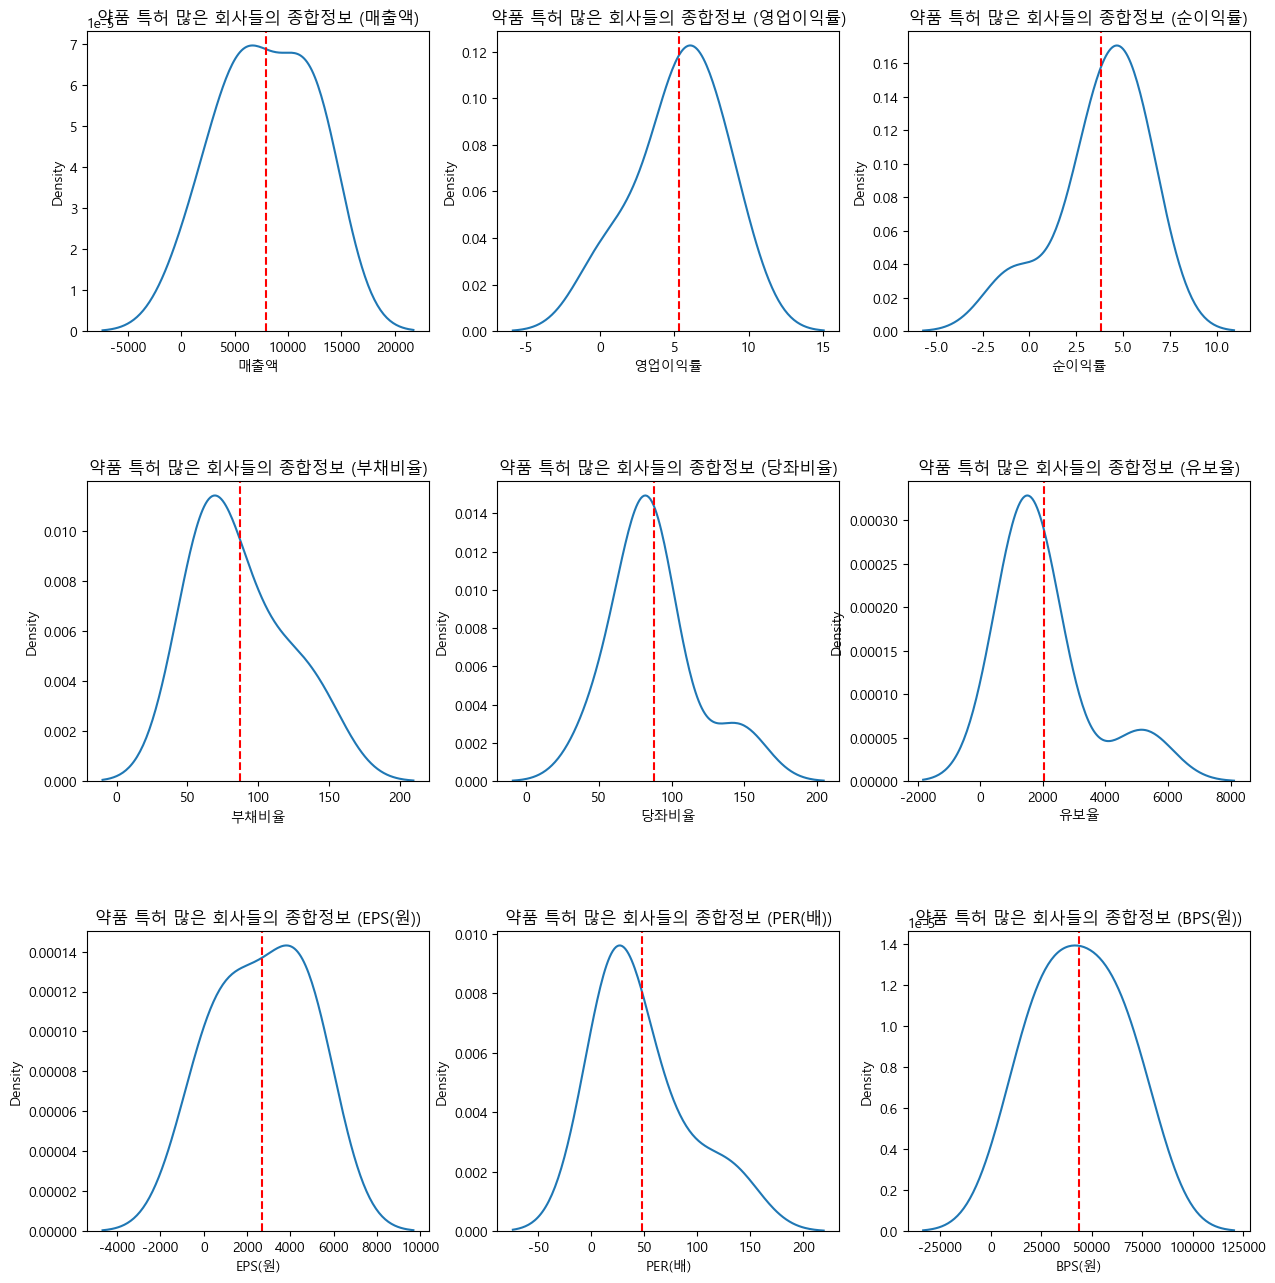

In [110]:
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize = [15,15])
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.5)
for i,var in enumerate(top30_columns):
    plt.subplot(3,3,i+1)
    plt.title(f'약품 특허 많은 회사들의 종합정보 ({var})')
    sns.kdeplot( data = top30_df,
                 x = var)
    plt.axvline( x = top30_df[var].mean(),linestyle = '--',c = 'r')

# 약품 승인이 많은 회사들의 30개들 중 상장해있는 회사들의 종합정보 분석

In [111]:
permit_list = ['하나제약',
'에이프로젠바이오로직스',
'대한뉴팜',
'동구바이오제약',
'테라젠이텍스',
'종근당',
'동국제약',
'셀트리온제약',
'바이넥스',
'안국약품',
'알리코제약',
'비보존제약',
'한국파비스제약',
'보령',
'제일약품',
'휴온스']

# 의약품 제조업으로 상장되어 있는 주가 정보에서 승인 많은 회사의 종합정보만 가져오자

In [112]:
permit_df = []

for i in permit_list:
    permit_df.append(stocks_df[stocks_df['업체'].str.contains(i)])
    
permit_df = pd.concat(permit_df)
permit_df

,업체,실적,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),PER(배),BPS(원),PBR(배),주당배당금(원),시가배당률(%),배당성향(%)
190,하나제약,최근 연간 실적 : 2019.12,1663.0,336.0,283.0,20.18,17.02,13.3,19.38,391.96,2727.68,1593.0,12.91,12734.0,1.62,419.0,2.04,25.56
191,하나제약,최근 연간 실적 : 2020.12,1773.0,317.0,149.0,17.87,8.40,6.58,19.02,341.74,2823.05,838.0,28.03,13431.0,1.75,465.0,1.98,53.86
192,하나제약,최근 연간 실적 : 2021.12,1964.0,360.0,280.0,18.33,14.26,11.57,20.48,242.47,2785.40,1576.0,12.78,14561.0,1.38,510.0,2.53,31.49
193,하나제약,최근 연간 실적 : 2022.12(E),2138.0,341.0,262.0,15.95,12.28,10.18,NaN,NaN,NaN,1477.0,10.97,15252.0,1.06,510.0,NaN,NaN
194,하나제약,최근 분기 실적 : 2021.09,497.0,82.0,77.0,16.53,15.57,7.0,16.36,341.73,2709.45,436.0,23.47,14151.0,1.56,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,휴온스,최근 분기 실적 : 2021.12,1137.0,44.0,-16.0,3.84,-1.44,12.18,61.43,114.49,4896.90,-86.0,18.51,22484.0,2.12,NaN,NaN,NaN
296,휴온스,최근 분기 실적 : 2022.03,1159.0,117.0,87.0,10.13,7.52,12.0,61.70,108.57,4454.87,731.0,18.35,22601.0,2.08,NaN,NaN,NaN
297,휴온스,최근 분기 실적 : 2022.06,1241.0,109.0,75.0,8.76,6.04,11.25,68.18,134.05,4582.41,638.0,14.15,23278.0,1.51,NaN,NaN,NaN
298,휴온스,최근 분기 실적 : 2022.09,1231.0,20.0,26.0,1.65,2.14,6.48,64.96,154.28,4621.35,195.0,21.55,23541.0,1.35,NaN,NaN,NaN


# 연간실적만 사용 하도록 뽑자 

In [113]:
permit_df = permit_df[permit_df['실적'].str.contains('연간')]
permit_df

,업체,실적,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),PER(배),BPS(원),PBR(배),주당배당금(원),시가배당률(%),배당성향(%)
190,하나제약,최근 연간 실적 : 2019.12,1663.0,336.0,283.0,20.18,17.02,13.3,19.38,391.96,2727.68,1593.0,12.91,12734.0,1.62,419.0,2.04,25.56
191,하나제약,최근 연간 실적 : 2020.12,1773.0,317.0,149.0,17.87,8.40,6.58,19.02,341.74,2823.05,838.0,28.03,13431.0,1.75,465.0,1.98,53.86
192,하나제약,최근 연간 실적 : 2021.12,1964.0,360.0,280.0,18.33,14.26,11.57,20.48,242.47,2785.40,1576.0,12.78,14561.0,1.38,510.0,2.53,31.49
193,하나제약,최근 연간 실적 : 2022.12(E),2138.0,341.0,262.0,15.95,12.28,10.18,NaN,NaN,NaN,1477.0,10.97,15252.0,1.06,510.0,NaN,NaN
80,에이프로젠바이오로직스,최근 연간 실적 : 2019.12,509.0,-20,-35,-3.85,-6.81,-4.19,5.08,1520.98,102.53,-43.0,-30.23,919.0,1.40,-,-,-
81,에이프로젠바이오로직스,최근 연간 실적 : 2020.12,533.0,-26,189,-4.89,35.48,2.99,2.83,3759.37,149.33,35.0,38.01,1268.0,1.04,-,-,-
82,에이프로젠바이오로직스,최근 연간 실적 : 2021.12,565.0,-38.0,92.0,-6.73,16.20,1.6,2.92,3472.71,153.85,20.0,44.52,1274.0,0.71,NaN,NaN,NaN
83,에이프로젠바이오로직스,최근 연간 실적 : 2022.12(E),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
670,대한뉴팜,최근 연간 실적 : 2019.12,1341.0,207,152,15.43,11.36,29.27,109.45,107.03,798.25,1062.0,9.80,4351.0,2.39,-,-,-
671,대한뉴팜,최근 연간 실적 : 2020.12,1493.0,246,-101,16.49,-6.78,-16.82,124.06,95.26,747.07,-705.0,-17.87,4221.0,2.99,-,-,-


# 결측값 제거 

In [114]:
cond = permit_df['영업이익'].isna()

na_index = permit_df.loc[cond].index

permit_df = permit_df.drop(index = na_index , axis = 0)
permit_df # 주식배당급이 없는 경우 - 로 표시되어있다.

,업체,실적,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),PER(배),BPS(원),PBR(배),주당배당금(원),시가배당률(%),배당성향(%)
190,하나제약,최근 연간 실적 : 2019.12,1663.0,336.0,283.0,20.18,17.02,13.3,19.38,391.96,2727.68,1593.0,12.91,12734.0,1.62,419.0,2.04,25.56
191,하나제약,최근 연간 실적 : 2020.12,1773.0,317.0,149.0,17.87,8.40,6.58,19.02,341.74,2823.05,838.0,28.03,13431.0,1.75,465.0,1.98,53.86
192,하나제약,최근 연간 실적 : 2021.12,1964.0,360.0,280.0,18.33,14.26,11.57,20.48,242.47,2785.40,1576.0,12.78,14561.0,1.38,510.0,2.53,31.49
193,하나제약,최근 연간 실적 : 2022.12(E),2138.0,341.0,262.0,15.95,12.28,10.18,NaN,NaN,NaN,1477.0,10.97,15252.0,1.06,510.0,NaN,NaN
80,에이프로젠바이오로직스,최근 연간 실적 : 2019.12,509.0,-20,-35,-3.85,-6.81,-4.19,5.08,1520.98,102.53,-43.0,-30.23,919.0,1.40,-,-,-
81,에이프로젠바이오로직스,최근 연간 실적 : 2020.12,533.0,-26,189,-4.89,35.48,2.99,2.83,3759.37,149.33,35.0,38.01,1268.0,1.04,-,-,-
82,에이프로젠바이오로직스,최근 연간 실적 : 2021.12,565.0,-38.0,92.0,-6.73,16.20,1.6,2.92,3472.71,153.85,20.0,44.52,1274.0,0.71,NaN,NaN,NaN
670,대한뉴팜,최근 연간 실적 : 2019.12,1341.0,207,152,15.43,11.36,29.27,109.45,107.03,798.25,1062.0,9.80,4351.0,2.39,-,-,-
671,대한뉴팜,최근 연간 실적 : 2020.12,1493.0,246,-101,16.49,-6.78,-16.82,124.06,95.26,747.07,-705.0,-17.87,4221.0,2.99,-,-,-
672,대한뉴팜,최근 연간 실적 : 2021.12,1666.0,267.0,157.0,16.03,9.42,22.15,91.16,109.07,956.66,1093.0,9.97,5876.0,1.86,80.0,0.73,7.15


In [115]:
permit_df = permit_df.replace('-',np.NaN) # '-' 를 결측값으로 변경해주고
permit_df = permit_df.fillna(0)
permit_df #결측값을 0으로 변경해준다.

,업체,실적,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),PER(배),BPS(원),PBR(배),주당배당금(원),시가배당률(%),배당성향(%)
190,하나제약,최근 연간 실적 : 2019.12,1663.0,336.0,283.0,20.18,17.02,13.3,19.38,391.96,2727.68,1593.0,12.91,12734.0,1.62,419.0,2.04,25.56
191,하나제약,최근 연간 실적 : 2020.12,1773.0,317.0,149.0,17.87,8.40,6.58,19.02,341.74,2823.05,838.0,28.03,13431.0,1.75,465.0,1.98,53.86
192,하나제약,최근 연간 실적 : 2021.12,1964.0,360.0,280.0,18.33,14.26,11.57,20.48,242.47,2785.40,1576.0,12.78,14561.0,1.38,510.0,2.53,31.49
193,하나제약,최근 연간 실적 : 2022.12(E),2138.0,341.0,262.0,15.95,12.28,10.18,0.00,0.00,0.00,1477.0,10.97,15252.0,1.06,510.0,0,0
80,에이프로젠바이오로직스,최근 연간 실적 : 2019.12,509.0,-20,-35,-3.85,-6.81,-4.19,5.08,1520.98,102.53,-43.0,-30.23,919.0,1.40,0,0,0
81,에이프로젠바이오로직스,최근 연간 실적 : 2020.12,533.0,-26,189,-4.89,35.48,2.99,2.83,3759.37,149.33,35.0,38.01,1268.0,1.04,0,0,0
82,에이프로젠바이오로직스,최근 연간 실적 : 2021.12,565.0,-38.0,92.0,-6.73,16.20,1.6,2.92,3472.71,153.85,20.0,44.52,1274.0,0.71,0,0,0
670,대한뉴팜,최근 연간 실적 : 2019.12,1341.0,207,152,15.43,11.36,29.27,109.45,107.03,798.25,1062.0,9.80,4351.0,2.39,0,0,0
671,대한뉴팜,최근 연간 실적 : 2020.12,1493.0,246,-101,16.49,-6.78,-16.82,124.06,95.26,747.07,-705.0,-17.87,4221.0,2.99,0,0,0
672,대한뉴팜,최근 연간 실적 : 2021.12,1666.0,267.0,157.0,16.03,9.42,22.15,91.16,109.07,956.66,1093.0,9.97,5876.0,1.86,80.0,0.73,7.15


In [116]:
permit_group = permit_df.groupby('업체').mean()
permit_company = permit_group.index

permit_group['업체'] = permit_company
permit_columns = permit_group.columns
permit_columns

C:\Users\whileduck\AppData\Local\Temp\ipykernel_53088\1002531790.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  permit_group = permit_df.groupby('업체').mean()


Index(['매출액', '영업이익률', '순이익률', '부채비율', '당좌비율', '유보율', 'EPS(원)', 'PER(배)',
       'BPS(원)', '업체'],
      dtype='object')

In [117]:
permit_group = permit_group[['업체','매출액', '영업이익률', '순이익률', '부채비율', '당좌비율', '유보율', 'EPS(원)', 'PER(배)',
       'BPS(원)']].reset_index(drop = True)
permit_group # 승인 많은 회사들의 주식 종합 정보 
             # 종근당 바이오와 종근당은 중첩되는 것으로 판단, 종근당은 drop 시켜주기로 하자 

,업체,매출액,영업이익률,순이익률,부채비율,당좌비율,유보율,EPS(원),PER(배),BPS(원)
0,대한뉴팜,1500.000000,15.983333,4.666667,108.223333,103.786667,833.993333,483.333333,0.633333,4816.000000
1,동구바이오제약,1398.333333,5.293333,8.213333,54.020000,76.920000,1432.090000,393.000000,20.736667,3314.666667
2,동국제약,5742.500000,12.780000,10.052500,37.285000,142.575000,1290.910000,1213.250000,17.665000,9675.250000
3,바이넥스,1373.750000,11.110000,9.440000,32.812500,157.080000,717.010000,418.500000,50.965000,5705.000000
4,보령,6105.000000,7.317500,6.305000,61.130000,123.462500,1003.602500,602.750000,23.367500,6330.250000
5,셀트리온제약,2686.000000,10.200000,7.530000,80.896667,100.800000,1617.583333,541.000000,239.290000,7710.666667
6,안국약품,1542.666667,0.283333,0.896667,44.263333,139.723333,2201.783333,131.666667,-12.726667,12746.000000
7,알리코제약,1269.333333,7.580000,6.296667,52.666667,131.163333,1304.516667,512.000000,18.160000,5094.000000
8,에이프로젠바이오로직스,535.666667,-5.156667,14.956667,3.610000,2917.686667,135.236667,4.000000,17.433333,1153.666667
9,제일약품,6878.000000,0.133333,-0.883333,143.160000,79.750000,2016.456667,-358.000000,13.733333,11629.333333


In [118]:
permit_group = permit_group.drop(index = 10,axis = 0)
permit_group

,업체,매출액,영업이익률,순이익률,부채비율,당좌비율,유보율,EPS(원),PER(배),BPS(원)
0,대한뉴팜,1500.000000,15.983333,4.666667,108.223333,103.786667,833.993333,483.333333,0.633333,4816.000000
1,동구바이오제약,1398.333333,5.293333,8.213333,54.020000,76.920000,1432.090000,393.000000,20.736667,3314.666667
2,동국제약,5742.500000,12.780000,10.052500,37.285000,142.575000,1290.910000,1213.250000,17.665000,9675.250000
3,바이넥스,1373.750000,11.110000,9.440000,32.812500,157.080000,717.010000,418.500000,50.965000,5705.000000
4,보령,6105.000000,7.317500,6.305000,61.130000,123.462500,1003.602500,602.750000,23.367500,6330.250000
5,셀트리온제약,2686.000000,10.200000,7.530000,80.896667,100.800000,1617.583333,541.000000,239.290000,7710.666667
6,안국약품,1542.666667,0.283333,0.896667,44.263333,139.723333,2201.783333,131.666667,-12.726667,12746.000000
7,알리코제약,1269.333333,7.580000,6.296667,52.666667,131.163333,1304.516667,512.000000,18.160000,5094.000000
8,에이프로젠바이오로직스,535.666667,-5.156667,14.956667,3.610000,2917.686667,135.236667,4.000000,17.433333,1153.666667
9,제일약품,6878.000000,0.133333,-0.883333,143.160000,79.750000,2016.456667,-358.000000,13.733333,11629.333333


In [119]:
permit_group.describe().T #승인 많은 회사들의 종합정보에 대한 테이블

,count,mean,std,min,25%,50%,75%,max
매출액,14.0,2713.982143,2104.893692,535.666667,1379.895833,1521.333333,3852.250000,6878.000000
영업이익률,14.0,6.831548,6.907925,-5.156667,0.988333,7.448750,11.081250,18.082500
순이익률,14.0,7.068512,4.319154,-0.883333,5.055000,6.917500,9.373750,14.956667
부채비율,14.0,56.938869,35.820879,3.610000,39.029583,52.161667,65.307500,143.160000
당좌비율,14.0,322.881369,748.038183,76.920000,101.546667,118.149583,141.862083,2917.686667
유보율,14.0,1426.664702,838.124046,135.236667,876.395625,1297.713333,1916.738333,3515.487500
EPS(원),14.0,675.958333,843.011630,-358.000000,289.250000,497.666667,692.937500,3173.250000
PER(배),14.0,30.000536,62.341932,-16.133333,13.899375,16.873333,20.092500,239.290000
BPS(원),14.0,10029.684524,7602.166877,1153.666667,5246.750000,7707.833333,12466.833333,29873.000000


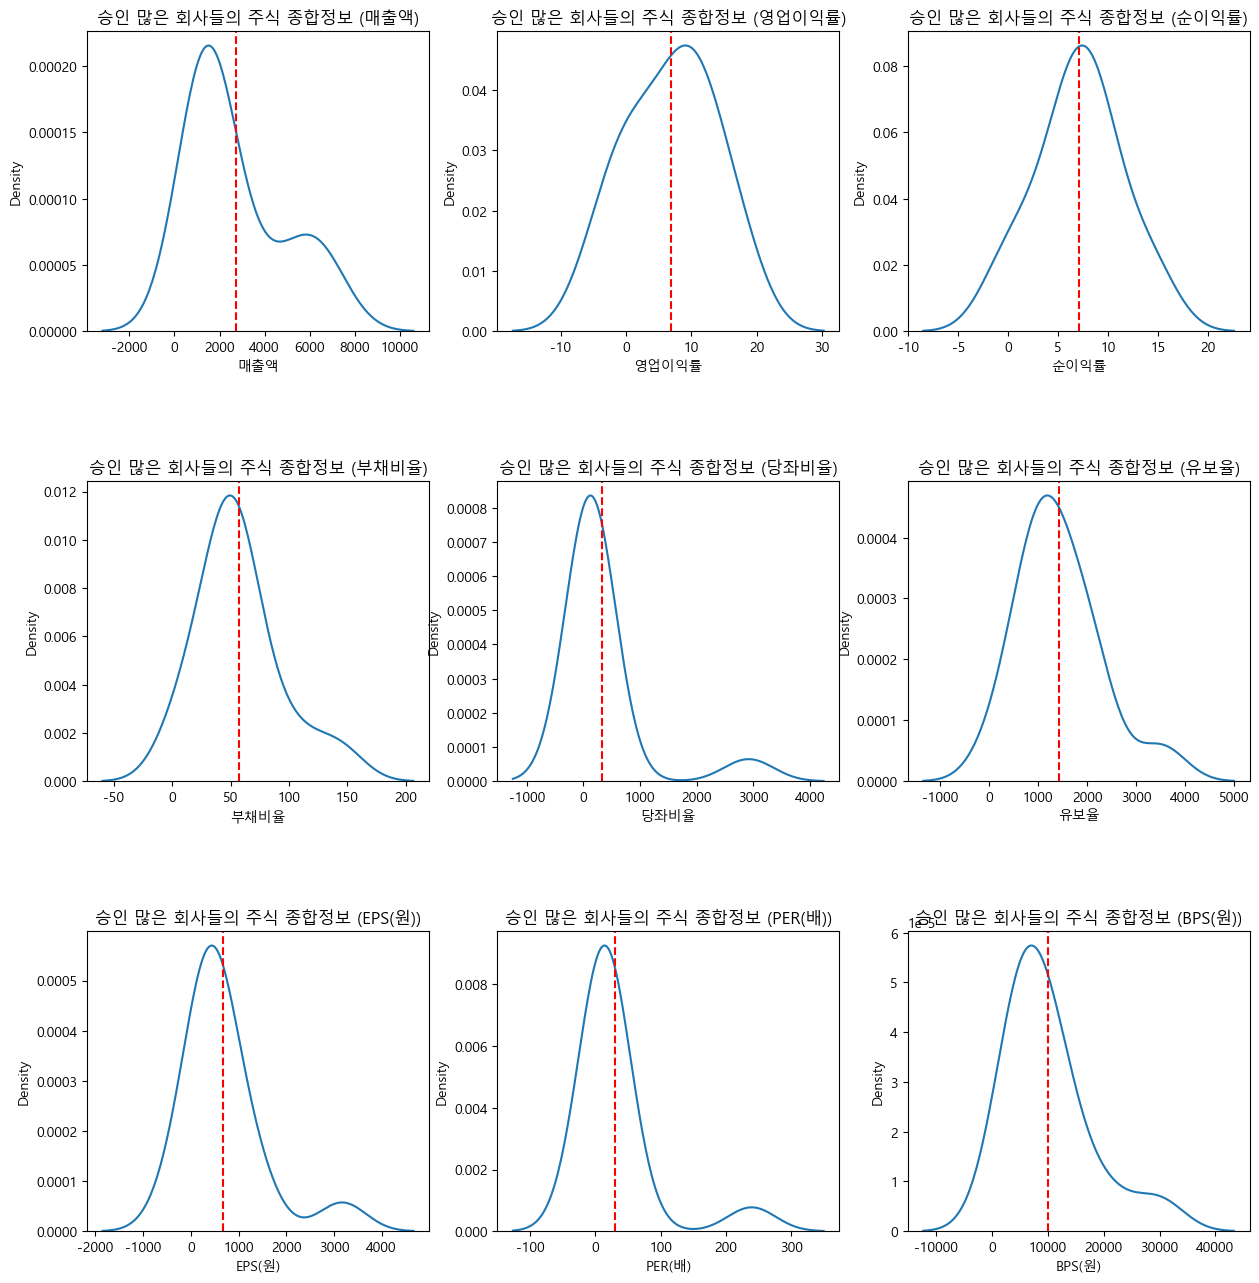

In [120]:
permit_columns = permit_group.columns.tolist()[1:]
plt.figure(figsize = [15,15])
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.5)
for i,var in enumerate(permit_columns):
    plt.subplot(3,3,i+1)
    plt.title(f'승인 많은 회사들의 주식 종합정보 ({var})')
    sns.kdeplot( data = permit_group,
                 x = var)
    plt.axvline (x = permit_group[var].mean(), linestyle = '--', c = 'r')

# 그래프를 겹쳐서 그릴 수 있도록 그래프를 합쳐서 그려보자 

In [121]:
top30_df['업체'] = '특허'
permit_group['업체'] = '승인'

In [122]:
total_df = pd.concat([top30_df,permit_group]).reset_index(drop = True) #특허와 승인을 하나의 데이터프레임으로 합쳐주고, 업체명은 특허와 승인으로 통일 시켜 바꿔주었다.

total_columns = total_df.columns[1:]
total_df

,업체,매출액,영업이익률,순이익률,부채비율,당좌비율,유보율,EPS(원),PER(배),BPS(원)
0,특허,11443.500000,5.570000,3.300000,73.492500,78.905000,1459.207500,2769.500000,79.262500,52544.500000
1,특허,5974.000000,5.886667,6.120000,59.646667,145.896667,1091.340000,4289.666667,29.666667,75297.666667
2,특허,6878.000000,0.133333,-0.883333,143.160000,79.750000,2016.456667,-358.000000,13.733333,11629.333333
3,특허,13012.250000,7.785000,5.162500,56.317500,88.955000,1435.170000,5371.250000,22.935000,44776.750000
4,특허,1346.666667,3.103333,3.100000,66.700000,82.690000,1114.226667,723.000000,16.313333,29873.000000
5,특허,4980.666667,5.616667,4.390000,117.086667,87.650000,5189.173333,1578.666667,40.390000,26787.000000
6,특허,11843.000000,9.052500,5.537500,91.905000,49.455000,1937.827500,4380.250000,131.460000,63244.500000
7,승인,1500.000000,15.983333,4.666667,108.223333,103.786667,833.993333,483.333333,0.633333,4816.000000
8,승인,1398.333333,5.293333,8.213333,54.020000,76.920000,1432.090000,393.000000,20.736667,3314.666667
9,승인,5742.500000,12.780000,10.052500,37.285000,142.575000,1290.910000,1213.250000,17.665000,9675.250000


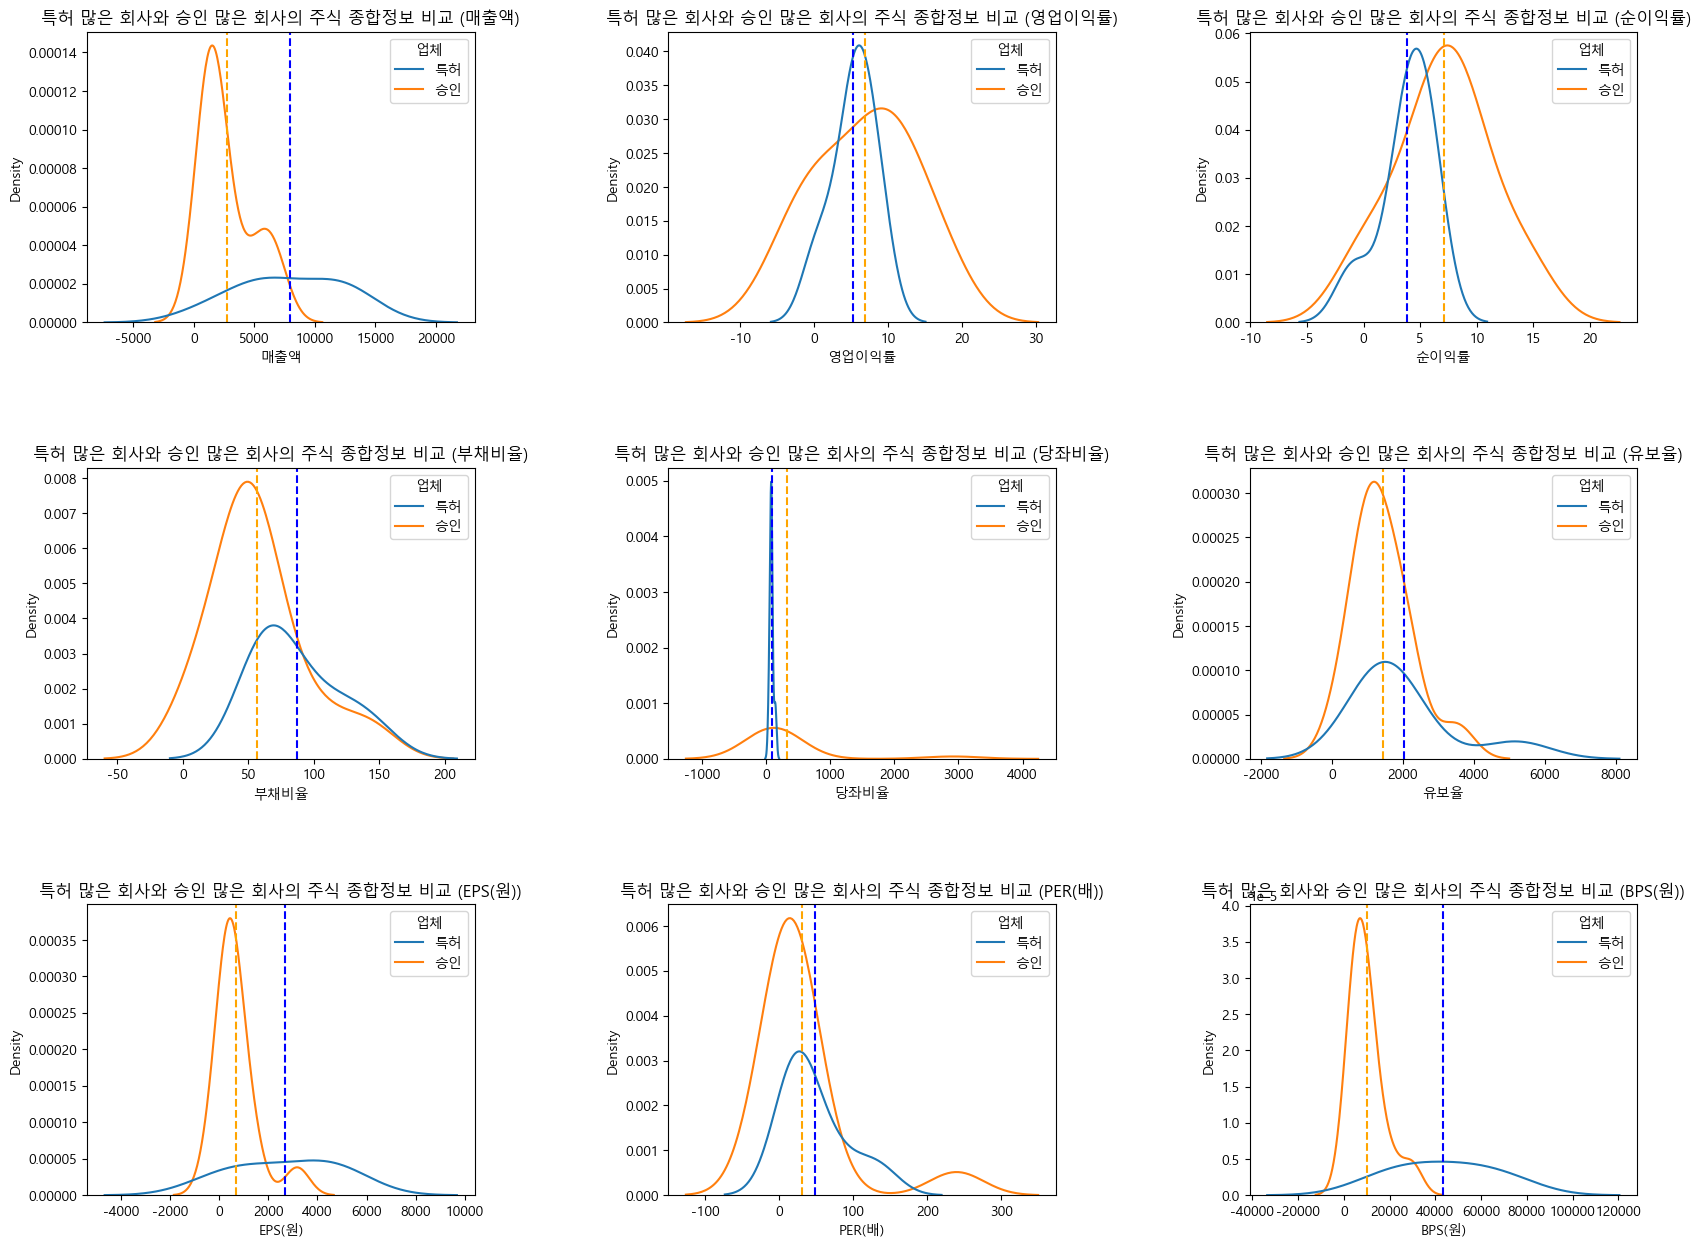

In [123]:
plt.figure(figsize = [20,20])
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.5)
for i,var in enumerate(total_columns):
    plt.subplot(4,3,i+1)
    sns.kdeplot (data = total_df,
                 x = var,
                 hue = '업체')
    plt.axvline(x = total_df.loc[total_df['업체'] == '승인',var].mean(),
                linestyle = '--', c = 'orange')
    plt.axvline(x = total_df.loc[total_df['업체'] == '특허',var].mean(),
                linestyle = '--', c = 'blue')
    plt.title(f'특허 많은 회사와 승인 많은 회사의 주식 종합정보 비교 ({var})')

In [124]:
mean_df = total_df.groupby('업체').mean()
mean_df.columns =['매출액(mean)','영업이익률(mean)','순이익률(mean)',
                  '부채비율(mean)','당좌비율(mean)','유보율(mean)',
                 'EPS(원)(mean)','PER(배)(mean)','BPS(원)(mean)']
mean_df['업체명'] = mean_df.index 
mean_df = mean_df.reset_index(drop=True)
mean_result = mean_df[['업체명','매출액(mean)','영업이익률(mean)','순이익률(mean)',
                  '부채비율(mean)','당좌비율(mean)','유보율(mean)',
                 'EPS(원)(mean)','PER(배)(mean)','BPS(원)(mean)']]

mean_result

,업체명,매출액(mean),영업이익률(mean),순이익률(mean),부채비율(mean),당좌비율(mean),유보율(mean),EPS(원)(mean),PER(배)(mean),BPS(원)(mean)
0,승인,2713.982143,6.831548,7.068512,56.938869,322.881369,1426.664702,675.958333,30.000536,10029.684524
1,특허,7925.440476,5.306786,3.818095,86.901190,87.614524,2034.771667,2679.190476,47.680119,43450.392857


In [125]:
sd_df = total_df.groupby('업체').var()**0.5
sd_df.columns = ['매출액(sd)','영업이익률(sd)','순이익률(sd)',
                  '부채비율(sd)','당좌비율(sd)','유보율(sd)',
                 'EPS(원)(sd)','PER(배)(sd)','BPS(원)(sd)']
sd_df['업체명'] = sd_df.index

sd_df = sd_df.reset_index(drop=True)
sd_result = sd_df[['업체명','매출액(sd)','영업이익률(sd)','순이익률(sd)',
                  '부채비율(sd)','당좌비율(sd)','유보율(sd)',
                 'EPS(원)(sd)','PER(배)(sd)','BPS(원)(sd)']]
sd_result

,업체명,매출액(sd),영업이익률(sd),순이익률(sd),부채비율(sd),당좌비율(sd),유보율(sd),EPS(원)(sd),PER(배)(sd),BPS(원)(sd)
0,승인,2104.893692,6.907925,4.319154,35.820879,748.038183,838.124046,843.011630,62.341932,7602.166877
1,특허,4290.626521,2.952211,2.355035,32.576339,28.915720,1436.909076,2121.514285,43.094327,22230.278234


In [126]:
result = pd.merge(mean_result,sd_result)
result.columns

Index(['업체명', '매출액(mean)', '영업이익률(mean)', '순이익률(mean)', '부채비율(mean)',
       '당좌비율(mean)', '유보율(mean)', 'EPS(원)(mean)', 'PER(배)(mean)',
       'BPS(원)(mean)', '매출액(sd)', '영업이익률(sd)', '순이익률(sd)', '부채비율(sd)',
       '당좌비율(sd)', '유보율(sd)', 'EPS(원)(sd)', 'PER(배)(sd)', 'BPS(원)(sd)'],
      dtype='object')

In [129]:
result = result[['업체명', '매출액(mean)', '매출액(sd)', '영업이익률(mean)', '영업이익률(sd)',
        '순이익률(mean)','순이익률(sd)', '부채비율(mean)','부채비율(sd)',
       '당좌비율(mean)','당좌비율(sd)', '유보율(mean)', '유보율(sd)',
        'EPS(원)(mean)','EPS(원)(sd)', 'PER(배)(mean)','PER(배)(sd)',
       'BPS(원)(mean)','BPS(원)(sd)']]

In [131]:
display(result.iloc[:,:11])
display(result.iloc[:,11:])

,업체명,매출액(mean),매출액(sd),영업이익률(mean),영업이익률(sd),순이익률(mean),순이익률(sd),부채비율(mean),부채비율(sd),당좌비율(mean),당좌비율(sd)
0,승인,2713.982143,2104.893692,6.831548,6.907925,7.068512,4.319154,56.938869,35.820879,322.881369,748.038183
1,특허,7925.440476,4290.626521,5.306786,2.952211,3.818095,2.355035,86.901190,32.576339,87.614524,28.915720


,유보율(mean),유보율(sd),EPS(원)(mean),EPS(원)(sd),PER(배)(mean),PER(배)(sd),BPS(원)(mean),BPS(원)(sd)
0,1426.664702,838.124046,675.958333,843.011630,30.000536,62.341932,10029.684524,7602.166877
1,2034.771667,1436.909076,2679.190476,2121.514285,47.680119,43.094327,43450.392857,22230.278234
